In [63]:
import numpy as np;
import math
import matplotlib.pyplot as plt

In [65]:
x = np.random.randn(30)
outlier_x = np.random.randn(20)

line = np.array([0.5, -1, 1])

def line(x, hasRandom=False, sigma=0.1, mu=0):
    val = 0
    if(hasRandom): 
        val = sigma * np.random.randn(x.shape[0]) + mu
    return (x/2) + 1 + val
y = line(x, hasRandom=True) 

y_true = line(x);
outlier_y = line(outlier_x, hasRandom=True, sigma=5, mu=5)

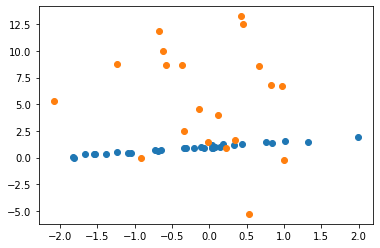

In [67]:
plt.scatter(x, y)
plt.scatter(outlier_x, outlier_y)
# plt.plot(x, y_true, 'g-')

In [76]:
def leastSquares(x, y):
    a = np.vstack([x, np.ones(len(x))]).T
    return np.dot(np.linalg.inv(np.dot(a.T, a)), np.dot(a.T, y))

In [77]:
class RANSAC:
    def __init__(self, curve_fitting_model):
        self.curve_fitting_model = curve_fitting_model
    
    def fit(self, X, Y, num_samples, threshold_error):
        num_iterations = math.inf
        count = 0;
        best_model = None;
        best_error = math.inf
        total_data = np.column_stack((X, Y))
        data_size = len(total_data)
        desired_prob = 0.95
        max_inlier_count = 0
        iter_count = 0
        while True:
            np.random.shuffle(total_data)
            sample_data = total_data[:num_samples, :]
            est_model = self.curve_fitting_model(sample_data[:,0], sample_data[:,1])
            est_model = est_model.reshape(est_model.shape[0], 1)
            x_pts = np.vstack([X, np.ones(len(X))])
            y_cap = x_pts.T.dot(est_model)
            err = np.abs(Y - y_cap)
            inlier_count = np.count_nonzero(err < threshold_error)12
            
            if(inlier_count == max_inlier_count):
                count = count + 1
            if(inlier_count > max_inlier_count):
                count = 0
                max_inlier_count = inlier_count
                best_model = est_model

            
            if(count > 50):
                break
        return (best_model, max_inlier_count)

In [78]:
def leastsq2(x, y):
    return np.polyfit(x, y, 1)

In [79]:
ransac = RANSAC(leastsq2)
model, inlier_count = ransac.fit(x, y, 2, 2)

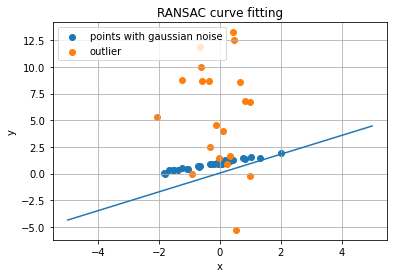

In [80]:
x_new_pts = np.linspace(-5, 5, 20)
y_pred = model[0] + model[1] * x_new_pts 
plt.scatter(x, y, label="points with gaussian noise")
plt.scatter(outlier_x, outlier_y, label="outlier")
plt.plot(x_new_pts, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.title('RANSAC curve fitting')
plt.grid()
plt.legend()
plt.show()

In [85]:
class RANSAC2:
    def __init__(self, curve_fitting_model):
        self.curve_fitting_model = curve_fitting_model
    
    def fit(self, X, Y, num_samples, threshold_error):
        num_iterations = math.inf
        count = 0;
        best_model = None;
        best_error = math.inf
        total_data = np.column_stack((X, Y))
        data_size = len(total_data)
        desired_prob = 0.99
        max_inlier_count = 0
        iter_count = 0
        while (num_iterations > iter_count):
            np.random.shuffle(total_data)
            sample_data = total_data[:num_samples, :]
            est_model = self.curve_fitting_model(sample_data[:,0], sample_data[:,1])
            est_model = est_model.reshape(est_model.shape[0], 1)
            x_pts = np.vstack([X, np.ones(len(X))])
            y_cap = x_pts.T.dot(est_model)
            err = np.abs(Y - y_cap)
            inlier_count = np.count_nonzero(err < threshold_error)

            
            if(inlier_count > max_inlier_count):
                count = 0
                max_inlier_count = inlier_count
                best_model = est_model

            prob_success = inlier_count / data_size
            print('prob_success', prob_success, inlier_count, data_size)
            num_iterations = np.log(1-desired_prob) / np.log(1 - prob_success**num_samples)
            print('num_iterations',num_iterations)
            iter_count = iter_count + 1
            # if(count > 50):
            #     break
        return (best_model, max_inlier_count, iter_count)

In [89]:
ransac2 = RANSAC2(leastsq2)
model, inlier_count, iter_count = ransac2.fit(x, y, 2, 0.01)

prob_success 0.5666666666666667 17 30
num_iterations 11.890514577181092
prob_success 0.2 6 30
num_iterations 112.8110039724562
prob_success 0.6 18 30
num_iterations 10.31885115851617
prob_success 0.3 9 30
num_iterations 48.82978483250534
prob_success 0.7 21 30
num_iterations 6.839247698175309
prob_success 0.4666666666666667 14 30
num_iterations 18.749440394145374
prob_success 0.5 15 30
num_iterations 16.007845559302186
prob_success 0.3 9 30
num_iterations 48.82978483250534
prob_success 0.5666666666666667 17 30
num_iterations 11.890514577181092
prob_success 0.36666666666666664 11 30
num_iterations 31.895356811748766
prob_success 0.3333333333333333 10 30
num_iterations 39.098756118182145
prob_success 0.43333333333333335 13 30
num_iterations 22.14223157004966
prob_success 0.4 12 30
num_iterations 26.412851860251482
prob_success 0.5666666666666667 17 30
num_iterations 11.890514577181092


In [90]:
print('MODEL=',model)
print('total iteration=', iter_count)

MODEL= [[0.40896021]
 [0.97831856]]
total iteration= 14


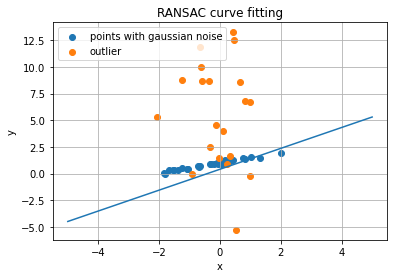

In [91]:
x_new_pts = np.linspace(-5, 5, 20)
y_pred = model[0] + model[1] * x_new_pts 
plt.scatter(x, y, label="points with gaussian noise")
plt.scatter(outlier_x, outlier_y, label="outlier")
plt.plot(x_new_pts, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.title('RANSAC curve fitting')
plt.grid()
plt.legend()
plt.show()